#### Numerical search for the upper bound to $S_m$

In [1]:
RealNumber = RealField(200) # set precision

Different from the `computeU` in the exact-finder, this one computes the numerical distribution of $U(m,p,\lambda)$ based on the given $p$ and $\lambda$ (`x` in the code).

In [2]:
def computeU(m,p,x):
    U_mat = matrix(RealNumber,m)
    U_mat[0,0] = 1
    
    sp = p * (m - 1) / (m - (m + 1) * p)
    hp = p / (1 - p)
    rho = 1 - hp

    phi = exp(-(1 - sp) / m)
    Lam = exp(-rho * x / (m - 1))
    
    for j in range(1,m):
        for k in range(j + 1): # if j = 1, k = 0 1
            if k < j:
                U_mat[j,k] = binomial(j,k) * (phi * Lam^(k+1))^(j-k) * U_mat[k,k]
            else: # k == j
                U_mat[j,j] = 1 - sum(U_mat[j,i] for i in range(j))
    
    return vector(U_mat[-1,:])

Given $m$, we observe that when we choose the numerically optimal $p$ such that $f(\lambda) < 1$, $\operatorname*{arg\,max}_{\lambda \in [0,\infty)}f(\lambda)$ is monotically converging to somewhere in $[0,1)$ as $m \to \infty$. The peaks always fall in $\lambda \in [0,1)$ after $m \geq 8$, and thus we will only consider this interval. We take 100 equally spaced points from this interval and see if all of them have function values less than 1.

In [3]:
def f_eval(m,p): # works for m with x_max < 0.99
    sp = p * (m - 1) / (m - (m + 1) * p)
    hp = p / (1 - p)
    y_lst = [0] * 100
    
    for i in range(100): # approximation by 100 points
        temp = computeU(m,p,i / 100)
        y_lst[i] = e^(-sp) * sum(e^((1 - hp * (1 + k)) * i / 100) * temp[k] for k in range(m))
        if y_lst[i] >= 1: # see if all 100 points have y value < 1
            return None
        
    return [vector([i / 100, y_lst[i]]) for i in range(100)]

In [4]:
%%time

p_flag = 0.2038
my_lst = []

# this for loop approximates the bounds for m >= 14
for m in range(14,20):
    while f_eval(m, p_flag) != None:
        p_flag = p_flag - 0.0001
        
    p_flag = p_flag + 0.0001
    my_lst.append(p_flag)

CPU times: user 20.3 s, sys: 88.6 ms, total: 20.4 s
Wall time: 20.5 s


In [5]:
my_lst

[0.20190000000000000000000000000000000000000000000000000000000,
 0.20030000000000000000000000000000000000000000000000000000000,
 0.19900000000000000000000000000000000000000000000000000000000,
 0.19780000000000000000000000000000000000000000000000000000000,
 0.19670000000000000000000000000000000000000000000000000000000,
 0.19579999999999999999999999999999999999999999999999999999999]

If you are interested in **checking a specific bound** given $m$ and
looking at our plot approximated by 100 points on [0,1):

Note that if `f_eval` gets y value $\geq 1$ in the `for` loop, then **a `TypeError` will be given instead**.

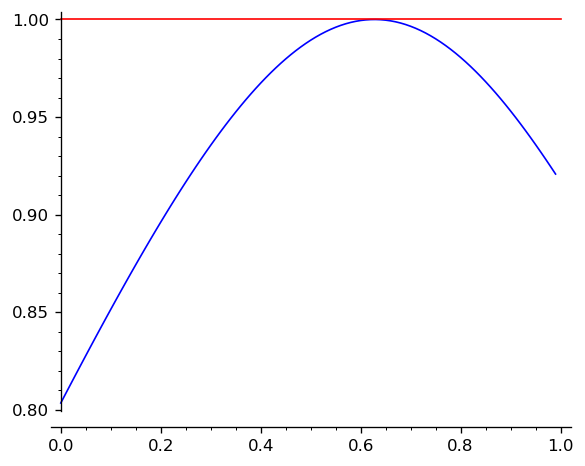

CPU times: user 49.8 s, sys: 237 ms, total: 50 s
Wall time: 50.4 s


In [6]:
%%time

RealNumber = RealField(600) # adjust precision

plt = line(f_eval(230, 0.18)) + plot(1, (x,0,1), color = 'red')
plt.show(figsize = [5,4], dpi = 120)
# plt.save('f_lambda_approx.png', figsize = [5,4], dpi = 300)

Thus we have developed a general way to approximately find upper bounds $q_m$ (introduced in the paper) to $S_m$ for *arbitrarily large $m$* in theory. Remember that for larger $m$, we need to increase our real number precision accordingly. This can be told by looking at the plot: if it looks continuous throughout, then the precision should be fine; if not, then one needs to increase the precision.

To achieve more accurate results one should consider evaluating more points on $[0,1)$ (or even in a small neighborhood around the observed argmax from the plot).